# Sınıflandırma Modelleri

# Gerekli Kütüphane ve Fonksiyonlar

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

# Veri Seti Hikayesi ve Problem: Şeker Hastalığı Tahmini

In [3]:
df = pd.read_csv("./diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Lojistik Regresyon (Logistic Regression)

# Model & Tahmin

In [5]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)

In [8]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [9]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [14]:
loj_model = LogisticRegression(solver = "liblinear").fit(X,y)

In [16]:
loj_model.intercept_

array([-5.88848445])

In [17]:
loj_model.coef_

array([[ 1.17086830e-01,  2.83748521e-02, -1.68971977e-02,
         7.45588118e-04, -6.42652274e-04,  5.97050348e-02,
         6.81461374e-01,  7.21476320e-03]])

In [18]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

In [19]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [20]:
y_pred = loj_model.predict(X)

In [21]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [120, 148]])

In [22]:
accuracy_score(y, y_pred)

0.7760416666666666

In [26]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.78       768
   macro avg       0.76      0.72      0.74       768
weighted avg       0.77      0.78      0.77       768



In [27]:
loj_model.predict_proba(X)[0:10]

array([[0.35043775, 0.64956225],
       [0.9169891 , 0.0830109 ],
       [0.22455276, 0.77544724],
       [0.92139736, 0.07860264],
       [0.16635686, 0.83364314],
       [0.79900619, 0.20099381],
       [0.88017597, 0.11982403],
       [0.27815669, 0.72184331],
       [0.32117452, 0.67882548],
       [0.92268273, 0.07731727]])

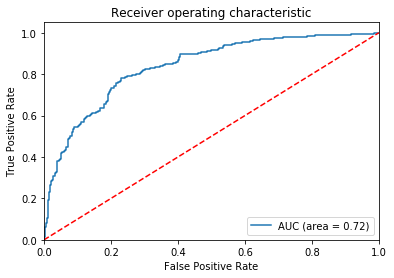

In [32]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))
fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Model Tuning (Model Doğrulama)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [139]:
loj_model = LogisticRegression(solver = "liblinear").fit(X_train,y_train)

In [35]:
y_pred = loj_model.predict(X_test)

In [36]:
print(accuracy_score(y_test, y_pred))

0.7575757575757576


In [42]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.7661231884057971

# K-En Yakın Komşu (KNN)

In [43]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [44]:
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

# Model & Tahmin

In [46]:
knn_model = KNeighborsClassifier().fit(X_train, y_train)

In [47]:
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [48]:
y_pred = knn_model.predict(X_test)

In [49]:
accuracy_score(y_test, y_pred)

0.6883116883116883

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



# Model Tuning

In [52]:
knn = KNeighborsClassifier()

In [54]:
np.arange(1,50)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [53]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [55]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10).fit(X_train, y_train)

In [56]:
knn_cv_model.best_score_

0.7486033519553073

In [57]:
knn_cv_model.best_params_

{'n_neighbors': 11}

In [ ]:
#final model

In [140]:
knn_tuned = KNeighborsClassifier(n_neighbors = 11).fit(X_train, y_train)

In [59]:
y_pred = knn_tuned.predict(X_test)

In [60]:
accuracy_score(y_test, y_pred)

0.7316017316017316

In [61]:
knn_tuned.score(X_test, y_test)

0.7316017316017316

# Destek Vektör Makineleri (SVM)

In [63]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

# Model & Tahmin

In [67]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [68]:
svm_model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [69]:
y_pred = svm_model.predict(X_test)

In [70]:
accuracy_score(y_test, y_pred)

0.7445887445887446

# Model Tuning

In [72]:
svm = SVC()

In [71]:
svm_params = {"C": np.arange(1,10), "kernel": ["linear","rbf"]}

In [73]:
svm_cv_model = GridSearchCV(svm, svm_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.9min finished


In [74]:
svm_cv_model.best_score_

0.7821229050279329

In [75]:
svm_cv_model.best_params_

{'C': 2, 'kernel': 'linear'}

In [ ]:
#final model

In [141]:
svm_tuned = SVC(C = 2, kernel = "linear").fit(X_train, y_train)

In [83]:
y_pred = svm_tuned.predict(X_test)

In [84]:
accuracy_score(y_test, y_pred)

0.7445887445887446

# Yapay Sinir Ağları (Çok Katmanlı Algılayıcılar)

In [85]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)




In [112]:
scaler = StandardScaler()

In [113]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [114]:
scaler.fit(X_test)
X_test = scaler.transform(X_test)

# Model & Tahmin

In [91]:
mlpc_model = MLPClassifier().fit(X_train, y_train)

In [92]:
mlpc_model.coefs_

[array([[ 1.83311219e-01,  2.26748952e-03,  1.44329265e-01,
          5.46850063e-02, -2.25935115e-01,  1.42777961e-01,
          2.93164947e-01,  2.10456815e-01,  1.02790721e-02,
         -1.58944223e-02,  4.33342884e-03, -3.72462155e-02,
         -6.27380259e-02, -9.98289998e-02,  9.02117782e-02,
         -1.62920187e-01,  1.92118168e-01, -2.20809289e-02,
          2.36837207e-01,  1.72696999e-02, -1.19696893e-01,
          3.16860624e-01,  2.17093027e-02,  7.65409184e-02,
          1.05763050e-07,  1.48786861e-01, -1.46346629e-03,
          2.17204906e-01, -1.45277485e-02, -4.75849145e-02,
          1.65885917e-02,  1.88804967e-01,  4.94087843e-02,
         -1.44456570e-01,  1.87021478e-01, -1.30017533e-01,
          1.94837493e-01,  2.82725021e-01,  1.09400804e-01,
          1.01561618e-01, -2.05394339e-01, -3.13156561e-02,
         -1.56363326e-01,  7.11361625e-05, -1.54822200e-01,
          1.31907501e-01, -6.46852454e-02, -1.71455105e-01,
         -2.17249305e-01,  5.24953381e-0

In [93]:
?mlpc_model

Type:        MLPClassifier
String form:
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
           beta_ <...> olver='adam', tol=0.0001,
           validation_fraction=0.1, verbose=False, warm_start=False)
File:        ~/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py
Docstring:  
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : tuple, length = n_layers - 2, default (100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default 'relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x)).

    - 'tanh', the hyperbo

In [94]:
y_pred = mlpc_model.predict(X_test)

In [95]:
accuracy_score(y_test, y_pred)

0.7186147186147186

# Model Tuning

In [115]:
mlpc_params = {"alpha":[1,5, 0.1,0.01, 0.03, 0.005, 0.0001],
              "hidden_layer_sizes": [(10,10), (100,100,100), (100,100), (3,5)]}

In [116]:
mlpc = MLPClassifier(solver = "lbfgs", activation = "logistic")

In [117]:
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:   29.0s finished


In [118]:
mlpc_cv_model

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='logistic', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='lbfgs', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [1, 5, 0.1, 0.01, 0.03, 0.00

In [119]:
mlpc_cv_model.best_params_

{'alpha': 1, 'hidden_layer_sizes': (3, 5)}

In [ ]:
#finalmodel

In [142]:
mlpc_tuned = MLPClassifier(solver = "lbfgs",activation='logistic', alpha = 1, hidden_layer_sizes = (3,5)).fit(X_train, y_train)

In [121]:
y_pred = mlpc_tuned.predict(X_test)

In [122]:
accuracy_score(y_test, y_pred)

0.7575757575757576

# CART (Classification and Regression Tree)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

# Model & Tahmin

In [8]:
cart_model = DecisionTreeClassifier().fit(X_train, y_train)

In [9]:
cart_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [10]:
y_pred = cart_model.predict(X_test)

In [11]:
accuracy_score(y_test, y_pred)

0.7142857142857143

# Model Tuning

In [16]:
cart = DecisionTreeClassifier()

In [22]:
cart_params = {"max_depth": [1,3,5,8,10],
              "min_samples_split": [2,3,5,10,20,50]}

In [23]:
cart_cv_model = GridSearchCV(cart, cart_params, cv = 10, n_jobs = -1, verbose =2).fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    3.3s finished


In [25]:
cart_cv_model.best_params_

{'max_depth': 5, 'min_samples_split': 20}

In [ ]:
#final model

In [143]:
cart_tuned = DecisionTreeClassifier(max_depth = 5, min_samples_split = 20).fit(X_train, y_train)

In [27]:
y_pred = cart_tuned.predict(X_test)

In [28]:
accuracy_score(y_test, y_pred)

0.7532467532467533

# Random Forests

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

# Model & Tahmin

In [29]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [30]:
rf_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.70995670995671

# Model Tuning

In [32]:
rf = RandomForestClassifier()

In [35]:
rf_params = {"n_estimators": [100,200,500,1000],
            "max_features": [3,5,7,8],
            "min_samples_split": [2,5,10,20]}

In [36]:
rf_cv_model = GridSearchCV(rf, rf_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  1.1min finished


In [38]:
rf_cv_model.best_params_

{'max_features': 8, 'min_samples_split': 5, 'n_estimators': 500}

In [ ]:
#final model

In [144]:
rf_tuned = RandomForestClassifier(max_features = 8, 
                                  min_samples_split = 5, 
                                  n_estimators = 500).fit(X_train, y_train)

In [40]:
y_pred = rf_tuned.predict(X_test)

In [41]:
accuracy_score(y_test, y_pred)

0.7445887445887446

In [ ]:
#degisken onem duzeyleri

In [58]:
rf_tuned

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

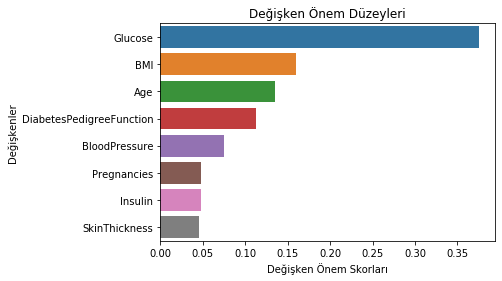

In [60]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

# Gradient Boosting Machines

# Model & Tahmin

In [61]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [63]:
?gbm_model

Type:        GradientBoostingClassifier
String form:
GradientBoostingClassifier(criterion='friedman_mse', init=None,
           learni <...>                  validation_fraction=0.1, verbose=0,
           warm_start=False)
Length:      100
File:        ~/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py
Docstring:  
Gradient Boosting for classification.

GB builds an additive model in a
forward stage-wise fashion; it allows for the optimization of
arbitrary differentiable loss functions. In each stage ``n_classes_``
regression trees are fit on the negative gradient of the
binomial or multinomial deviance loss function. Binary classification
is a special case where only a single regression tree is induced.

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'deviance', 'exponential'}, optional (default='deviance')
    loss function to be optimized. 'deviance' refers to
    deviance (= logistic regression) for classification
 

In [64]:
y_pred = gbm_model.predict(X_test)

In [65]:
accuracy_score(y_test, y_pred)

0.7489177489177489

# Model Tuning

In [67]:
gbm = GradientBoostingClassifier()

In [68]:
gbm_params = {"learning_rate": [0.1, 0.01, 0.001, 0.05],
             "n_estimators": [100, 300, 500, 1000],
             "max_depth":[2,3,5,8]}

In [71]:
gbm_cv_model= GridSearchCV(gbm, gbm_params, 
                           cv = 10, 
                           n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  1.1min finished


In [72]:
gbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}

In [ ]:
#final model

In [73]:
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.01,
                                       max_depth = 5, 
                                       n_estimators = 500).fit(X_train, y_train)

In [74]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

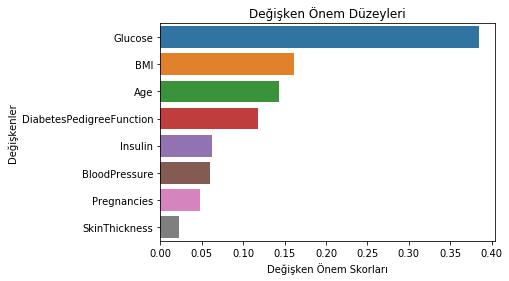

In [75]:
feature_imp = pd.Series(gbm_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

# XGBoost

# Model & Tahmin

In [77]:
!pip install xgboost

In [78]:
from xgboost import XGBClassifier

In [79]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [80]:
?xgb_model

Type:        XGBClassifier
String form:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
           colsample_byno <...> reg_lambda=1, scale_pos_weight=1, seed=None,
           silent=None, subsample=1, verbosity=1)
File:        ~/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost classification.

Parameters
----------
max_depth : int
    Maximum tree depth for base learners.
learning_rate : float
    Boosting learning rate (xgb's "eta")
n_estimators : int
    Number of trees to fit.
verbosity : int
    The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
silent : boolean
    Whether to print messages while running boosting. Deprecated. Use verbosity instead.
objective : string or callable
    Specify the learning task and the corresponding learning objective or
    a custom objective function to be used (see note below).
booster: string
    Specify which booster to use: gbtree, gblin

In [81]:
y_pred = xgb_model.predict(X_test)

In [82]:
accuracy_score(y_test, y_pred)

0.7489177489177489

# Model Tuning

In [83]:
xgb = XGBClassifier()

In [84]:
xgb_params = {"n_estimators": [100, 500, 1000],
             "subsample":[0.6,0.8,1],
             "max_depth":[3,5,7],
             "learning_rate":[0.1,0.001,0.01]}

In [87]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, 
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:   37.8s finished


In [92]:
xgb_cv_model.best_params_

{'learning_rate': 0.001, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.6}

In [93]:
xgb_tuned = xgb = XGBClassifier(learning_rate= 0.001, 
                                max_depth= 7, 
                                n_estimators= 500, 
                                subsample= 0.6).fit(X_train, y_train)

In [94]:
y_pred = xgb_tuned.predict(X_test)

In [95]:
accuracy_score(y_test,y_pred)

0.7575757575757576

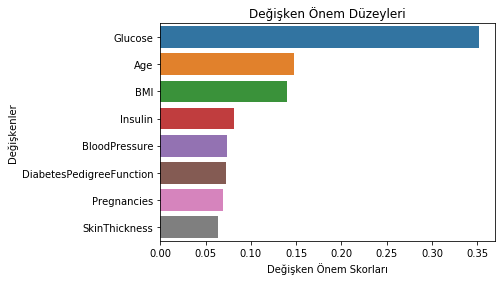

In [96]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

# Light GBM

# Model & Tahmin

In [97]:
!pip install lightgbm

In [ ]:
!conda install -c conda-forge lightgbm

In [98]:
from lightgbm import LGBMClassifier

/Users/mvahit/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [100]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [101]:
?lgbm_model

Type:           LGBMClassifier
String form:   
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
           impo <...> ambda=0.0, silent=True,
           subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
File:           ~/anaconda3/lib/python3.7/site-packages/lightgbm/sklearn.py
Docstring:      LightGBM classifier.
Init docstring:
Construct a gradient boosting model.

Parameters
----------
boosting_type : string, optional (default='gbdt')
    'gbdt', traditional Gradient Boosting Decision Tree.
    'dart', Dropouts meet Multiple Additive Regression Trees.
    'goss', Gradient-based One-Side Sampling.
    'rf', Random Forest.
num_leaves : int, optional (default=31)
    Maximum tree leaves for base learners.
max_depth : int, optional (default=-1)
    Maximum tree depth for base learners, -1 means no limit.
learning_rate : float, optional (default=0.1)
    Boosting learning rate.
    You can use ``callbacks`` parameter of ``fit`` method to shrink/adapt

In [102]:
y_pred = lgbm_model.predict(X_test)

In [103]:
accuracy_score(y_test,y_pred)

0.7272727272727273

# Model Tuning

In [104]:
lgbm = LGBMClassifier()

In [105]:
lgbm_params = {"learning_rate": [0.001, 0.01, 0.1],
              "n_estimators": [200, 500, 100],
              "max_depth":[1,2,35,8]}

In [108]:
lgbm_params = {"learning_rate": [0.001, 0.01, 0.1],
              "n_estimators": [200, 500, 100],
              "max_depth":[1,2,35,8]}
lgbm_cv_model = GridSearchCV(lgbm,lgbm_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)
lgbm_cv_model.best_params_

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 337 out of 360 | elapsed:    6.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    6.3s finished


In [109]:
lgbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}

In [110]:
lgbm_tuned = LGBMClassifier(learning_rate= 0.01, 
                            max_depth= 1, 
                            n_estimators= 500).fit(X_train, y_train)

In [111]:
y_pred = lgbm_tuned.predict(X_test)

In [112]:
accuracy_score(y_test, y_pred)

0.7575757575757576

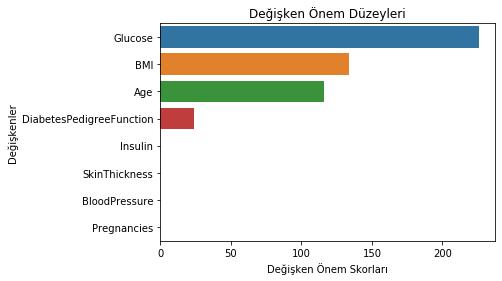

In [113]:
feature_imp = pd.Series(lgbm_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

# CatBoost

# Model & Tahmin

In [121]:
!pip install catboost

In [122]:
from catboost import CatBoostClassifier

In [123]:
catb_model = CatBoostClassifier().fit(X_train, y_train, verbose = False)

In [126]:
?catb_model

Type:            CatBoostClassifier
String form:     <catboost.core.CatBoostClassifier object at 0x7ff1d9326ef0>
File:            ~/anaconda3/lib/python3.7/site-packages/catboost/core.py
Docstring:       <no docstring>
Class docstring: CatBoost model. Contains training, prediction and evaluation methods.
Init docstring: 
Initialize the CatBoost.

Parameters
----------
params : dict
    Parameters for CatBoost.
    If  None, all params are set to their defaults.
    If  dict, overriding parameters present in dict.


In [124]:
y_pred = catb_model.predict(X_test)

In [125]:
accuracy_score(y_test, y_pred)

0.7359307359307359

# Model Tuning

In [129]:
catb = CatBoostClassifier()

In [130]:
catb_params = {"iterations":[200,500,100],
              "learning_rate":[0.01, 0.03, 0.1],
              "depth":[4,5,8]}

In [132]:
catb_cv_model = GridSearchCV(catb, catb_params, 
                             cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  4.1min finished


0:	learn: 0.6749075	total: 20.9ms	remaining: 4.17s
1:	learn: 0.6586537	total: 35.9ms	remaining: 3.55s
2:	learn: 0.6425268	total: 50.9ms	remaining: 3.34s
3:	learn: 0.6247661	total: 64.8ms	remaining: 3.17s
4:	learn: 0.6079451	total: 78.9ms	remaining: 3.08s
5:	learn: 0.5939632	total: 93.6ms	remaining: 3.02s
6:	learn: 0.5792526	total: 107ms	remaining: 2.95s
7:	learn: 0.5688651	total: 123ms	remaining: 2.94s
8:	learn: 0.5562211	total: 140ms	remaining: 2.97s
9:	learn: 0.5444938	total: 154ms	remaining: 2.92s
10:	learn: 0.5348107	total: 167ms	remaining: 2.87s
11:	learn: 0.5261863	total: 182ms	remaining: 2.85s
12:	learn: 0.5148002	total: 197ms	remaining: 2.83s
13:	learn: 0.5055527	total: 211ms	remaining: 2.8s
14:	learn: 0.4989946	total: 229ms	remaining: 2.83s
15:	learn: 0.4912710	total: 245ms	remaining: 2.81s
16:	learn: 0.4852215	total: 261ms	remaining: 2.81s
17:	learn: 0.4786486	total: 275ms	remaining: 2.78s
18:	learn: 0.4713345	total: 288ms	remaining: 2.75s
19:	learn: 0.4645211	total: 304ms	re

In [133]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.03}

In [134]:
catb_tuned = CatBoostClassifier(depth= 8, 
                                iterations= 200, 
                                learning_rate= 0.03).fit(X_train, y_train)

0:	learn: 0.6749075	total: 14.7ms	remaining: 2.93s
1:	learn: 0.6586537	total: 28.2ms	remaining: 2.79s
2:	learn: 0.6425268	total: 41.2ms	remaining: 2.71s
3:	learn: 0.6247661	total: 52.4ms	remaining: 2.57s
4:	learn: 0.6079451	total: 63.1ms	remaining: 2.46s
5:	learn: 0.5939632	total: 73.6ms	remaining: 2.38s
6:	learn: 0.5792526	total: 83.1ms	remaining: 2.29s
7:	learn: 0.5688651	total: 92.9ms	remaining: 2.23s
8:	learn: 0.5562211	total: 102ms	remaining: 2.17s
9:	learn: 0.5444938	total: 112ms	remaining: 2.13s
10:	learn: 0.5348107	total: 123ms	remaining: 2.11s
11:	learn: 0.5261863	total: 134ms	remaining: 2.1s
12:	learn: 0.5148002	total: 145ms	remaining: 2.08s
13:	learn: 0.5055527	total: 154ms	remaining: 2.05s
14:	learn: 0.4989946	total: 165ms	remaining: 2.03s
15:	learn: 0.4912710	total: 176ms	remaining: 2.02s
16:	learn: 0.4852215	total: 182ms	remaining: 1.96s
17:	learn: 0.4786486	total: 192ms	remaining: 1.94s
18:	learn: 0.4713345	total: 201ms	remaining: 1.92s
19:	learn: 0.4645211	total: 208ms	

In [135]:
y_pred = catb_tuned.predict(X_test)

In [136]:
accuracy_score(y_test, y_pred)

0.7532467532467533

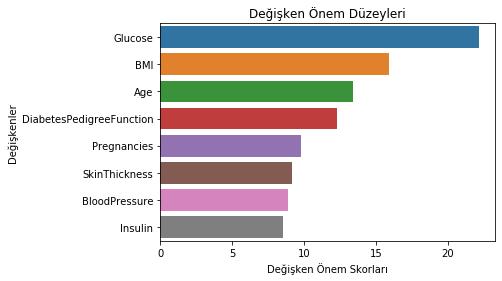

In [137]:
feature_imp = pd.Series(catb_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

# Tüm Modellerin Karşılaştırılması

In [150]:
modeller = [
    knn_tuned,
    loj_model,
    svm_tuned,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned]

sonuc = []
sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)

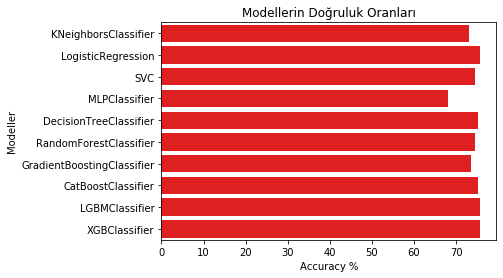

In [151]:
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');

In [152]:
sonuclar

,Modeller,Accuracy
0,KNeighborsClassifier,73.160173
0,LogisticRegression,75.757576
0,SVC,74.458874
0,MLPClassifier,67.965368
0,DecisionTreeClassifier,75.324675
0,RandomForestClassifier,74.458874
0,GradientBoostingClassifier,73.593074
0,CatBoostClassifier,75.324675
0,LGBMClassifier,75.757576
0,XGBClassifier,75.757576


# Daha Başka Ne Yapılabilir?

1. Değişken türetme / değişken mühendisliği
2. Değişken seçme
3. Otomatik ML
4. Model deployment